In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn
%matplotlib inline

In [2]:
df = pd.read_csv('ex1data1.txt', header=None)

In [3]:
df.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


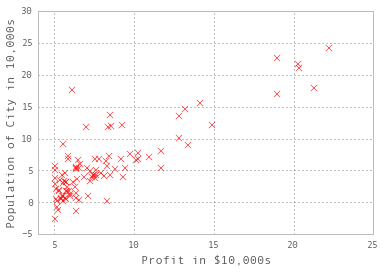

In [4]:
plt.scatter(df.loc[:,0], df.loc[:,1], color='r', marker='x', s=40);
plt.xlabel('Profit in $10,000s');
plt.ylabel('Population of City in 10,000s');
plt.xlim((4, 25));

In [5]:
X, y = df.loc[:,0].values, df.loc[:,1].values
m = X.shape[0]
X = X.reshape((m, 1))
y = y.reshape((m,1))
n = X.shape[1]

X = np.concatenate((np.ones((m,1)), X), axis=1)
theta = np.zeros((n+1, 1))
n_iter = 1500
alpha = 0.01

In [6]:
#cost
def J(theta, X, y):
    m = X.shape[0]
    predictions = hypothesis(theta, X)
    residuals = (predictions - y).ravel()
    result = 1./(2*m) * np.dot(residuals, residuals)
    return result
def hypothesis(theta, X):
    return np.dot(X, theta)
    

In [7]:
J(theta, X, y)

32.072733877455676

In [8]:
#from sympy import diff, symbols

def gradient_descent(theta, X, y, n_iter, alpha, color=u'b'):
    J_history = np.zeros(n_iter)
    for i in range(n_iter):
        theta = theta - 1.*alpha * J_theta(theta, X, y)
        J_history[i] = J(theta, X, y)
    plt.scatter(range(n_iter), J_history, c=color)
    plt.ylabel('cost function')
    plt.xlabel('iterations')
    return theta

def J_theta(theta, X, y):
#     theta = symbols('theta')
#     return diff(J(theta, X, y), theta)
    m = X.shape[0]
    residuals = np.dot(X, theta)-y
    return 1./m * np.dot(X.T, residuals)

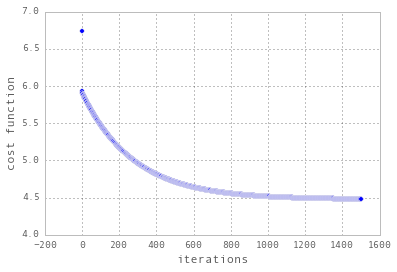

In [9]:
theta = gradient_descent(np.zeros((2, 1)), X, y, n_iter=1500, alpha=0.01)

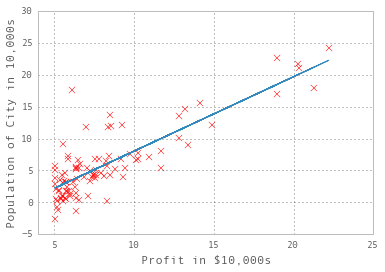

In [10]:
plt.scatter(df.loc[:,0], df.loc[:,1], color='r', marker='x', s=40)
plt.plot(X[:,1], hypothesis(theta, X))
plt.xlabel('Profit in $10,000s')
plt.ylabel('Population of City in 10,000s')
plt.xlim((4, 25));

In [11]:
df_multi = pd.read_csv('ex1data2.txt', header=None)

In [12]:
df_multi.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [13]:
X_multi = df_multi.loc[:,[0,1]].values
x_mean, x_std = X_multi.mean(axis=0), X_multi.std(axis=0)
X_multi = (X_multi - x_mean)/ x_std
X_multi = np.concatenate((np.ones((X_multi.shape[0], 1)), X_multi), axis=1)
y_multi = df_multi.loc[:,2].values
theta = np.zeros((3,1))

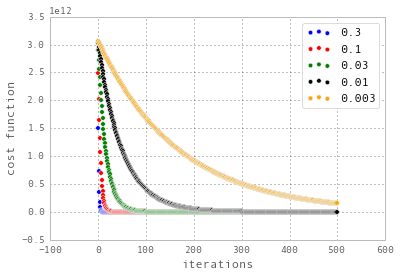

In [14]:
alphas= [0.3, 0.1, 0.03, 0.01, 0.003]
colors = ['b', 'r', 'green', 'k', 'orange']
for alpha, color in zip(alphas, colors):
    gradient_descent(np.zeros((3,1)), X_multi, y_multi, n_iter=500, alpha=alpha, color=color)
    plt.legend(alphas)